# Visualizing Amounts

The most common way of visualizing amounts (i.e., quantities or magnitudes) is using bar plots. However, **not all bar plots are the same and sometimes other options (such as dot plots and heatmaps) may be a better choice**. Throughout the notebook, I'll make claims on best practices when using bar plots. In summary, I make the case that:
1. [Horizontal bars are better than vertical bars for long labels](#1.0-Horizontal-bars-are-better-than-vertical-bars-for-long-labels)
2. [Order bars by magnitude unless there is a "natural" ordering](#2.0-Order-bars-by-magnitude-unless-there-is-a-"natural"-ordering)
3. [Use Dot plots when starting at zero backfires](#3.0-Use-Dot-plots-when-starting-at-zero-backfires)

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

## Data and Helper Functions

In [152]:
airlines_market = {
    'American': 18.3,
    'Alaska': 5.7,
    'JetBlue': 5.4,
    'United': 14.3,
    'Spirit': 4.7,
    'Southwest': 17.1,
    'Delta': 17.1,
    'SkyWest': 3.2,
    'Frontier': 3.2,
    'Hawaiian': 1.8,
    'Other': 9.19999999999999}

indices = list(airlines_market.keys())
market_amount = list(airlines_market.values())

def get_canvas(title = None, figsize = (6, 4), **kwargs):
    "Returns axes with title and y-label"
    fig, ax = plt.subplots(figsize = figsize, **kwargs)
    
    if not isinstance(ax, np.ndarray):
        if title is None:
            ax.set_title("Airline Domestic Market Share June 2021 - May 2022")
        else:
            ax.set_title(title)
        return ax
    
    for axis_i in ax:
        axis_i.set_ylabel('Market Share (%)')
    return ax

## 1.0 Horizontal bars are better than vertical bars for long labels

First, let's look at the simplest barplot obtained using ``ax.bar``. 

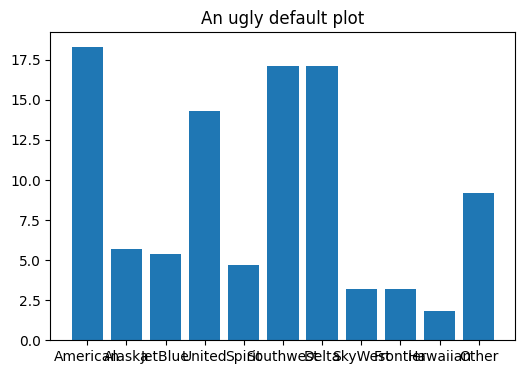

In [153]:
ax = get_canvas(title = 'An ugly default plot')
ax.bar(x = indices, height = market_amount)
plt.show()

The default plot leaves a lot to be desired. First, the category labels run into each other. To solve this problem, we can
1. Increase the size of the figure
2. Rotate the labels

**None of those options work in my opinion.**

### 1.1 Increasing the size of the figure

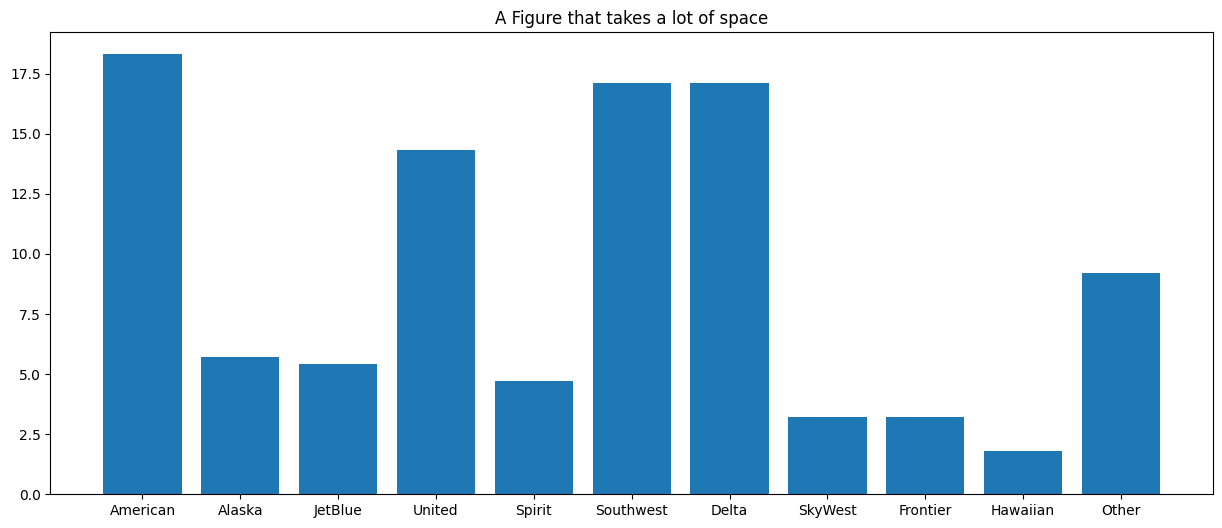

In [154]:
ax = get_canvas('A Figure that takes a lot of space', figsize=(15, 6))
ax.bar(x = indices, height = market_amount)
plt.show()

### 1.2 Rotating labels

I think rotating labels create lots of visual issues as there is text going in three different directions. (left figure) and turning the labels 90 degrees may hurt your neck!

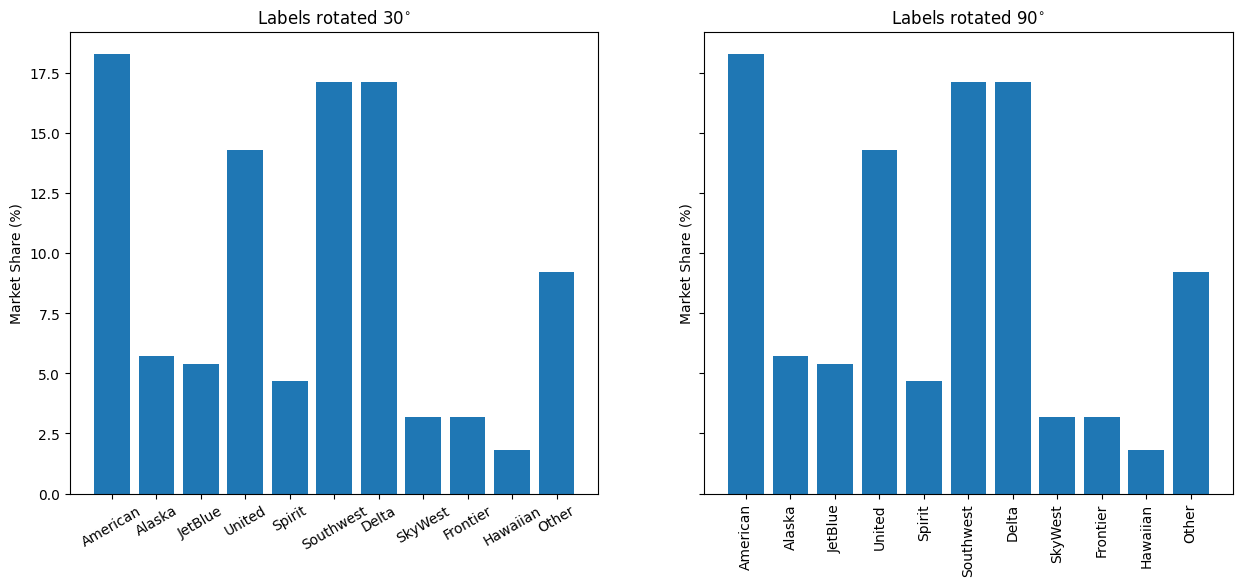

In [277]:
ax = get_canvas(nrows=1, ncols=2, sharey = True, title = "", figsize=(15, 6))
ax[0].bar(x = indices, height = market_amount, tick_label = indices)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha='center')
ax[0].set_title(r'Labels rotated $30 ^{\circ} $')

ax[1].bar(x = indices, height = market_amount, tick_label = indices)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='center')
ax[1].set_title(r'Labels rotated $90 ^{\circ} $');

### 1.3 A better solution

The better solution for long labels is usually to swap the *X* and the *Y* axis, so that the bars run horizontally.  After swapping the axes, we obtain a compact figure in which all visual elements, including all text, are horizontally oriented. As a result, **the figure is much easier to read** than the options shown before.

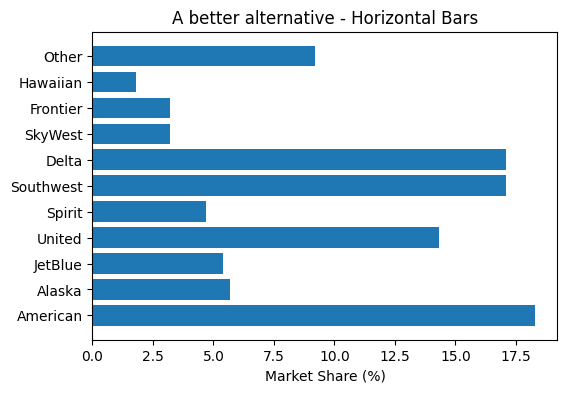

In [156]:
ax = get_canvas(title = "A better alternative - Horizontal Bars")
ax.barh(y = indices, width = market_amount)
ax.set_xlabel('Market Share (%)')
plt.show()

## 2.0 Order bars by magnitude unless there is a "natural" ordering

The order in which bars are arranged should be meaningful to the context. Sometimes, plotting libraries arranged the bars by alphabetical order of the labels.

*Bars should be arranged in order of their magnitude unless there is a natural or inherent ordering, such as time or age.*

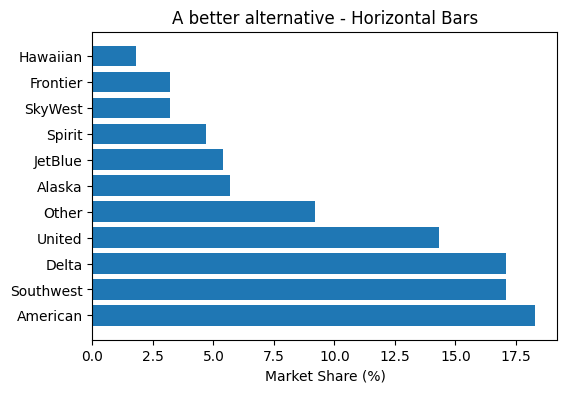

In [157]:
ax = get_canvas(title = "A better alternative - Horizontal Bars")

# Merge two lists into list of tuples, order by market share and split
labels_and_values = tuple(zip(indices, market_amount))
labels_and_values = sorted(labels_and_values, key = lambda x: x[1], reverse = True)
labels_and_values = list(zip(*labels_and_values))

# Plotting
ax.barh(y = labels_and_values[0], width = labels_and_values[1])
ax.set_xlabel('Market Share (%)')
plt.show()

### 2.1 Horizontal bars ordered "naturally"

Looking at the number of fighters in each UFC weight category, it makes sense to order the bars with respect to weight and not the number of fighters.

In [201]:
df = pd.read_csv('ufc_master_data.csv')
grp = df.groupby(['gender', 'weight'])
df_grp = grp.size()['Male']

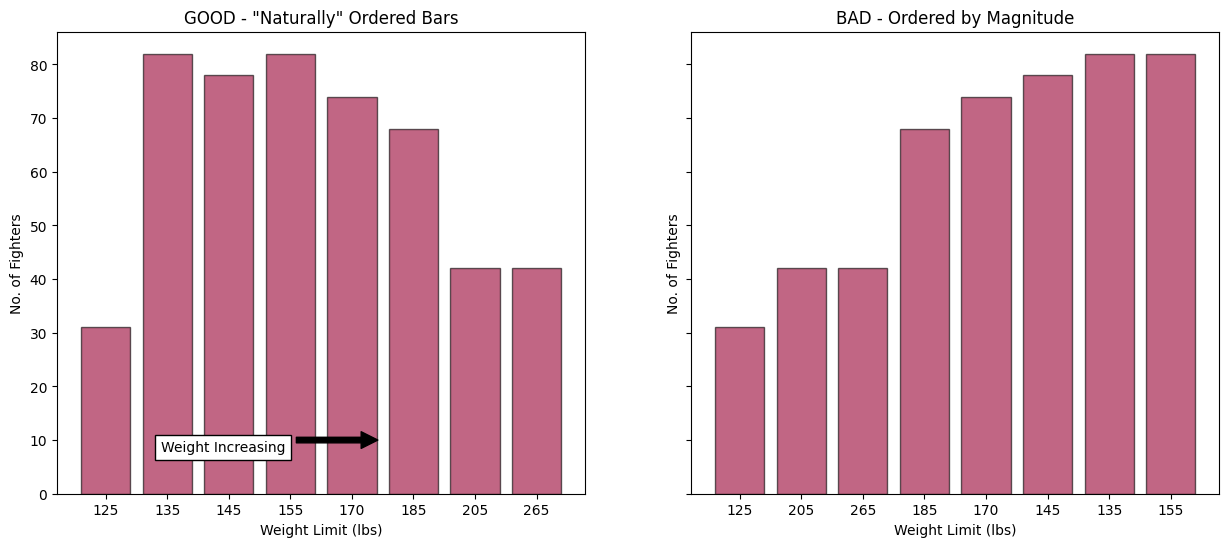

In [365]:
kwargs = dict(color = '#990033', edgecolor = 'black', alpha = 0.6 )
ax = get_canvas(nrows=1, ncols=2, sharey = True, title = "", figsize=(15, 6))

# Bars in increasing weight order (natural)
ax[0].bar(x = range(len(df_grp)), 
          height = df_grp.values, 
          tick_label = df_grp.index, **kwargs)
ax[0].set_title(r'GOOD - "Naturally" Ordered Bars')
ax[0].set_xlabel('Weight Limit (lbs)')
ax[0].set_ylabel('No. of Fighters')

# Adding Label
ax[0].annotate('Weight Increasing', xy=(4.5, 10), xycoords='data',
            xytext=(-70, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox=dict(fc="white"),
            horizontalalignment='right', verticalalignment='top')

# Bars arranged in order of the numbers of fighters
idx_sorted = np.argsort(df_grp.values)

ax[1].bar(x = range(len(df_grp)), 
          height = df_grp.values[idx_sorted], 
          tick_label = df_grp.index[idx_sorted], **kwargs)
ax[1].set_title('BAD - Ordered by Magnitude')
ax[1].set_xlabel('Weight Limit (lbs)')
ax[1].set_ylabel('No. of Fighters');

## 3.0 Use Dot plots when starting at zero backfires

One important limitation of bars is that they need to start at zero, so that the bar length is proportional to the amount shown.

For some datasets, this can:
 - be impractical (i.e., datasets far away from zero)
 - obscure key features
 - be misleading as the bar lengths do not accurately represent the data values. 

Read Life Expectancy Data

In [375]:
life_exp = pd.read_csv('gapminder.csv', index_col = 0)
life_exp = life_exp[life_exp['continent'] == 'Americas']
life_exp.reset_index(drop = True, inplace = True)

# Extract Data for plot
life_exp_years = life_exp['life_exp'].values
countries = life_exp['country'].values
idx_sorted = np.argsort(life_exp_years)

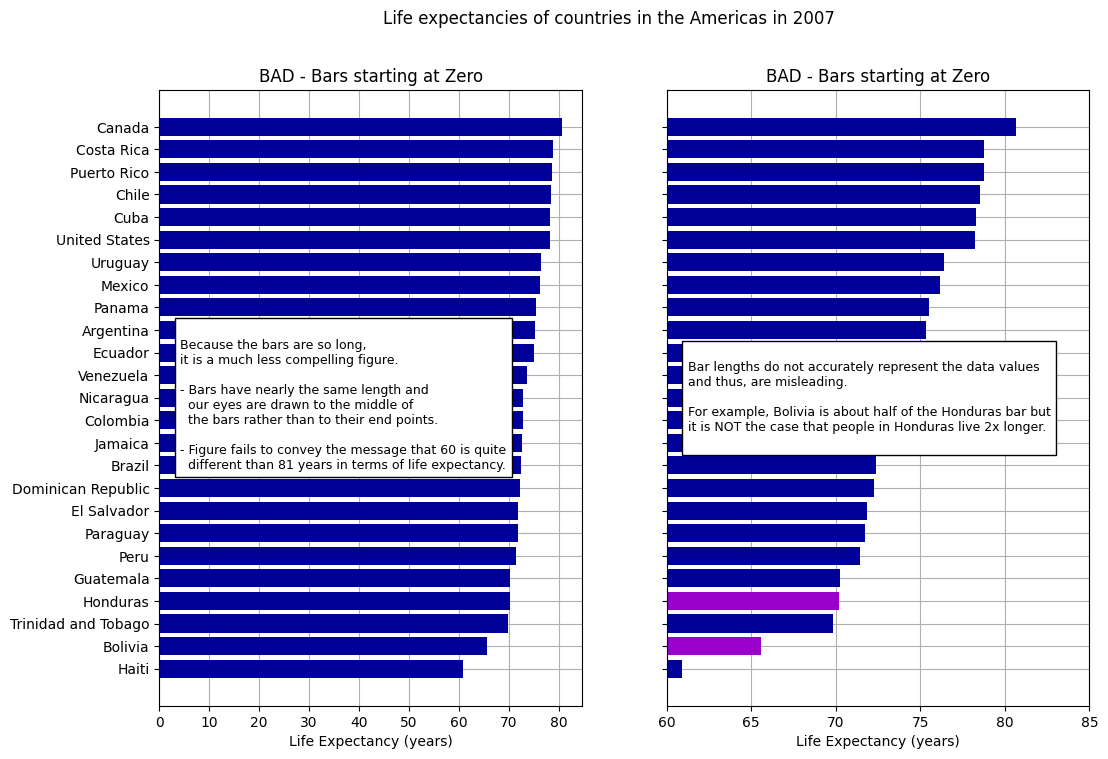

In [376]:
fig, ax = plt.subplots(ncols = 2, figsize = (12, 8), sharey = True)
for ax_i in ax:
    ax_i.grid()
    ax_i.set_axisbelow(True)
    ax_i.set_xlabel('Life Expectancy (years)')
    ax_i
    
ax[0].barh(y = countries[idx_sorted], width = life_exp_years[idx_sorted], color = '#000099')
ax[0].set_title('BAD - Bars starting at Zero')


ax[1].barh(y = countries[idx_sorted], width = life_exp_years[idx_sorted],
           color = np.where(np.isin(countries[idx_sorted], ['Bolivia', 'Honduras']), '#9900CC', '#000099') )
ax[1].set_title('BAD - Bars starting at Zero')
ax[1].set_xlim(60, 85)

# ADDING TEXT ANNOTATIONS
props=dict(facecolor='white',alpha=1)
fig_1_text = """
Because the bars are so long, \nit is a much less compelling figure.\n
- Bars have nearly the same length and\n  our eyes are drawn to the middle of
  the bars rather than to their end points.\n
- Figure fails to convey the message that 60 is quite
  different than 81 years in terms of life expectancy."""
ax[0].text(0.05, 0.5, fig_1_text, transform=ax[0].transAxes, fontsize=9,
        verticalalignment='center', horizontalalignment='left', bbox=props)

fig_2_text = """
Bar lengths do not accurately represent the data values
and thus, are misleading. 

For example, Bolivia is about half of the Honduras bar but
it is NOT the case that people in Honduras live 2x longer.
"""
ax[1].text(0.05, 0.5, fig_2_text, transform=ax[1].transAxes, fontsize=9,
        verticalalignment='center', horizontalalignment='left', bbox=props)

plt.suptitle('Life expectancies of countries in the Americas in 2007')
plt.show()

### 3.1 A better solution

By limiting the axis range to the interval from 60 to 81 years, the figure highlights the key features of this dataset: 
- Canada has the highest life expectancy among all listed countries; and
- Bolivia and Haiti have much lower life expectancies than all other countries. 

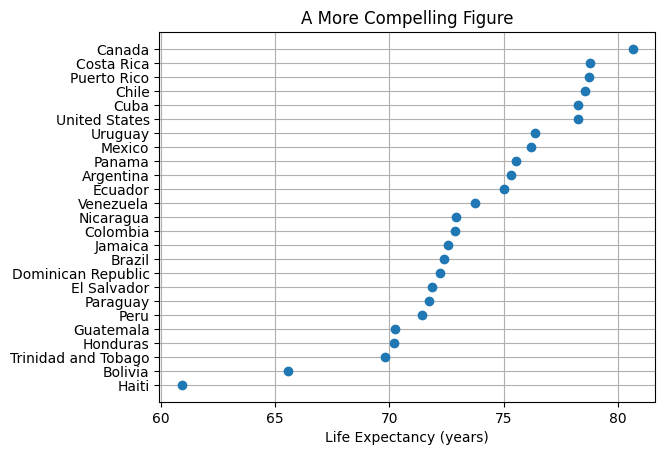

In [377]:
fig, ax = plt.subplots()
ax.scatter(x = life_exp_years[idx_sorted], y = countries[idx_sorted])
ax.grid() ; ax.set_axisbelow(True)
ax.set_xlabel('Life Expectancy (years)')
ax.set_xticks(ticks = np.arange(60, 82, 5))
ax.set_title('A More Compelling Figure');

## 2.0 Order based on magnitude unless there is a "natural" ordering

In [258]:
# Read coffee data & calculate caffeine per volume
caffeine = pd.read_csv('caffeine.csv')
caffeine['Caffeine_per_vol (mg/fl_oz)'] = caffeine['Caffeine (mg)'] / (caffeine['Volume (ml)'] / 29.574)
caffeine = caffeine[caffeine['Caffeine_per_vol (mg/fl_oz)'] <= 120] 


# Discretize observations based on caffeine per fl_oz and get 2 of each group 
out = pd.qcut(caffeine['Caffeine_per_vol (mg/fl_oz)'], q = 10, retbins = False)
grp = caffeine.groupby(out)
df = grp.apply(lambda x: x.loc[random.sample(list(x.index), 2)])
df.reset_index(drop = True, inplace=True)

In [259]:
df

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine_per_vol (mg/fl_oz)
0,Propel Zero Powder,473.176000,0,0,Energy Drinks,0.000000
1,A&W Root Beer,354.882000,170,0,Soft Drinks,0.000000
2,Tea (White),236.588000,0,28,Tea,3.500059
3,Snapple Tea,473.176000,150,37,Tea,2.312539
4,Crystal Light Energy Mix,473.176000,10,60,Energy Drinks,3.750063
5,Pure Kick Energy Drink Mix,499.792150,10,80,Energy Drinks,4.733808
6,Tru Energy Wakeup,354.882000,10,100,Energy Drinks,8.333474
7,Yellow Tea,236.588000,0,63,Tea,7.875133
8,Hype Energy Drink (EU),250.191810,108,80,Energy Drinks,9.456425
9,MATI Energy Drink,354.882000,90,110,Energy Drinks,9.166822


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000028B3406E290> (for post_execute):


TypeError: 'tuple' object is not callable

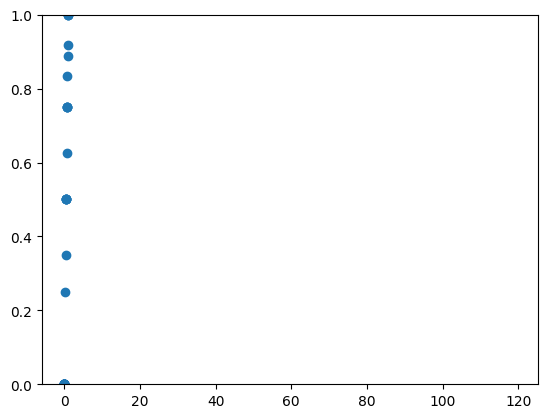

In [260]:
fig, ax = plt.subplots()
ax.scatter(x = caffeine['Caffeine_per_vol (mg/fl_oz)'].values, 
           y = caffeine['Caffeine_per_vol (mg/fl_oz)'].values)
ax.set_ylim = (0, 30)

In [227]:
out = pd.qcut(caffeine['Caffeine_per_vol (mg/fl_oz)'], q = 10)

In [228]:
out

0        (17.53, 32.554]
1          (12.5, 17.53]
2           (10.0, 12.5]
3      (32.554, 310.005]
4         (5.838, 8.333]
             ...        
605        (3.75, 5.838]
606      (-0.001, 2.181]
607       (5.838, 8.333]
608      (-0.001, 2.181]
609       (5.838, 8.333]
Name: Caffeine_per_vol (mg/fl_oz), Length: 610, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 2.181] < (2.181, 3.75] < (3.75, 5.838] < (5.838, 8.333] ... (10.0, 12.5] < (12.5, 17.53] < (17.53, 32.554] < (32.554, 310.005]]

In [200]:
caffeine[caffeine['Caffeine (mg)'] == 1555]

,drink,Volume (ml),Calories,Caffeine (mg),type
85,Black Label Brewed Coffee,354.882,0,1555,Coffee


In [198]:
caffeine.describe()

,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


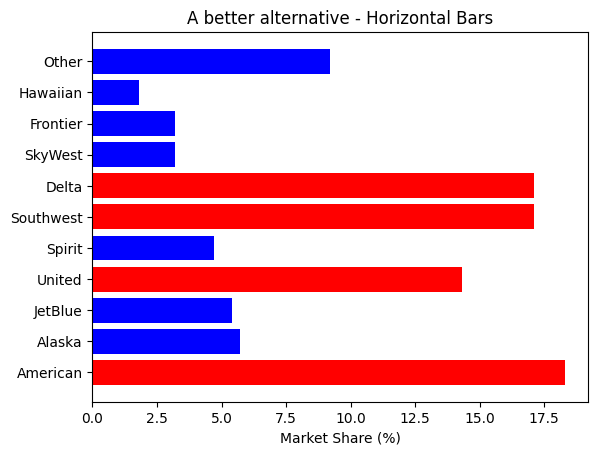

In [125]:
ax = get_canvas(title = "A better alternative - Horizontal Bars")
ax.barh(y = indices, 
        width = market_amount, 
        color = np.where(np.array(market_amount) > 10, 'red', 'blue'))
ax.set_xlabel('Market Share (%)')
plt.show()

In [108]:
f.x

88